In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arrow
plt.style.use('ggplot')
%matplotlib inline

### 1.数据清理

In [4]:
df = pd.read_json('./file/suzhou_land.json')

In [65]:
df2 = df.copy()

In [66]:
#用arrow函数将时间格式化
df2['QDRQ'] = df2['QDRQ'].apply(lambda x:int(arrow.get(x).format('YYYY')))

In [67]:
#过滤出时间在2009到2018年的行
df2 = df2[df2['QDRQ'].apply(lambda x:2008<x<2019)]

In [68]:
#过滤出居住用地
df2 = df2[df2['TDYT']=='其他普通商品住房用地']

### 2.数据分析

#### 2.1按区域统计出让宗数

In [69]:
#拷贝一份数据做行政分析
xz = df2.copy()

In [86]:
#查看出让单位
xz['PZDW'].groupby(by=xz['PZDW']).count()

PZDW
中国江苏省苏州工业园区          3
中国江苏省苏州工业园区人民政府     16
吴江市人民政府             35
吴江市人民法院              4
吴江市国土资源局             1
太仓市人民政府            137
太仓市人民政府              6
太仓市国土资源局             2
市政府                  3
常熟人民政府               1
常熟市人民政府            175
张家港市                10
张家港市人民政府           169
张家港市国土资源局            1
昆山市                 79
昆山市人民政府             63
苏州工业园区人民政府           3
苏州工业园区管理委员会          3
苏州市                210
苏州市人民政府             83
苏州市吴江区人民政府         136
苏州市国土资源局             3
苏州市政府               26
Name: PZDW, dtype: int64

In [83]:
#定义一个函数，统一出让单位
def get_region(x):
    if '工业园区' in x:
        return '工业园区'
    elif '吴江' in x:
        return '吴江市'
    elif '太仓市' in x:
        return '太仓市'
    elif '常熟' in x:
        return '常熟市'
    elif '张家港市' in x:
        return '张家港市'
    elif '昆山市' in x:
        return '昆山市'
    elif '苏州市' in x or '市政府' in x:
        return '苏州市'
    else:
        return '其他'

In [84]:
#新建列，统一出让单位
xz['PZDW1'] = xz['PZDW'].apply(lambda x:get_region(x))

In [92]:
xz['PZDW1'].groupby(by=xz['PZDW1']).count().sort_values(ascending=False)

PZDW1
苏州市     325
张家港市    180
常熟市     176
吴江市     176
太仓市     145
昆山市     142
工业园区     25
Name: PZDW1, dtype: int64

Text(0, 0.5, '')

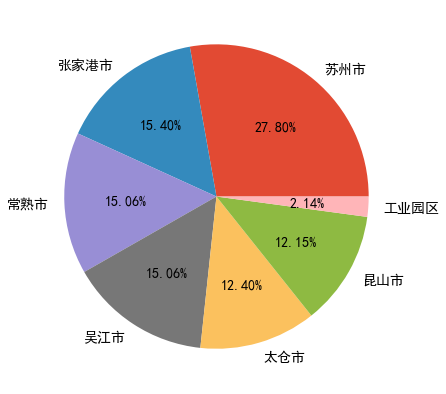

In [134]:
zd = xz['PZDW1'].groupby(by=xz['PZDW1']).count().sort_values(ascending=False) 
zd.plot(kind='pie',figsize=(7,7),autopct='%.2f%%',fontsize=14)
plt.ylabel('')

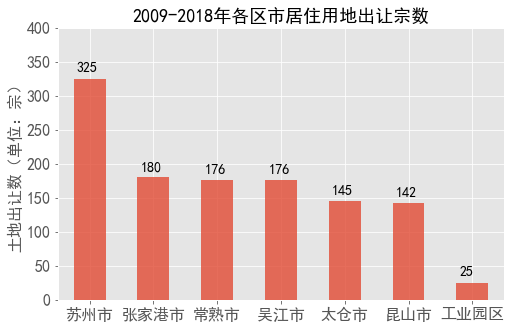

In [135]:
zd.plot(kind='bar',fontsize=16,figsize=(8,5),ylim=(0,400),alpha=0.8)
plt.xticks(rotation=0)
plt.title('2009-2018年各区市居住用地出让宗数',fontsize=18)
plt.xlabel('')
plt.ylabel('土地出让数（单位：宗）',fontsize=16)
for i in range(len(zd)):
    plt.text(i-0.2,zd[i]+10,zd[i],fontsize=14)

#### 2.2按区域统计出让面积

In [144]:
xz['MJ'].groupby(by=xz['PZDW1']).sum()

PZDW1
吴江市      949.538214
太仓市      571.311068
工业园区     193.267397
常熟市      663.442560
张家港市     739.037034
昆山市     1047.619670
苏州市     2236.953939
Name: MJ, dtype: float64

Text(0, 0.5, '')

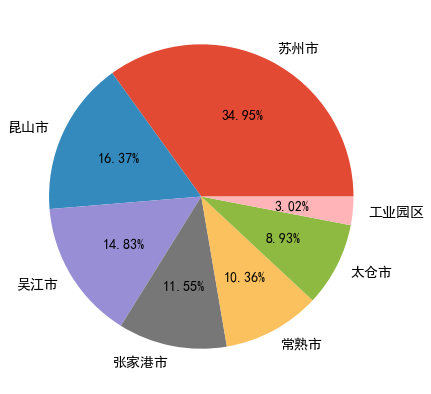

In [145]:
mj = xz['MJ'].groupby(by=xz['PZDW1']).sum().sort_values(ascending=False) 
mj.plot(kind='pie',figsize=(7,7),autopct='%.2f%%',fontsize=14)
plt.ylabel('')

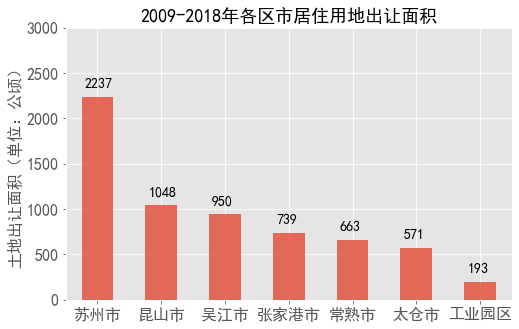

In [151]:
mj.plot(kind='bar',fontsize=16,figsize=(8,5),ylim=(0,3000),alpha=0.8)
plt.xticks(rotation=0)
plt.title('2009-2018年各区市居住用地出让面积',fontsize=18)
plt.xlabel('')
plt.ylabel('土地出让面积（单位：公顷）',fontsize=16)
for i in range(len(zd)):
    plt.text(i-0.2,mj[i]+100,'{:.0f}'.format(mj[i]),fontsize=14)

#### 2.3按区域统计出让金额

In [154]:
xz.columns

Index(['XZQM', 'XMMC', 'XMWZ', 'HTMH', 'DZJGH', 'MJ', 'TDLY', 'TDYT', 'GDFS',
       'SYNX', 'HYFL', 'TDJB', 'CJJG', 'FQZFYD', 'TDSYR', 'YDRJL_MIN',
       'YDRJL_MAX', 'YDJDSJ', 'YDKGSJ', 'YDJGSJ', 'PZDW', 'QDRQ', 'PZDW1'],
      dtype='object')

Text(0, 0.5, '')

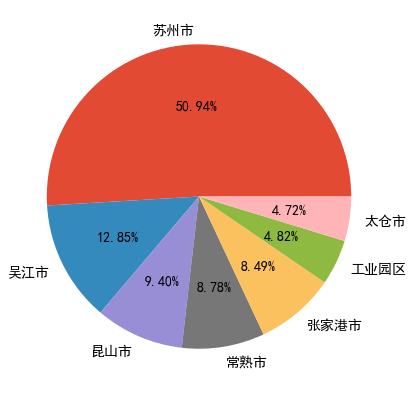

In [166]:
je = xz['CJJG'].groupby(by=xz['PZDW1']).sum().sort_values(ascending=False)/10000
je.plot(kind='pie',figsize=(7,7),autopct='%.2f%%',fontsize=14)
plt.ylabel('')

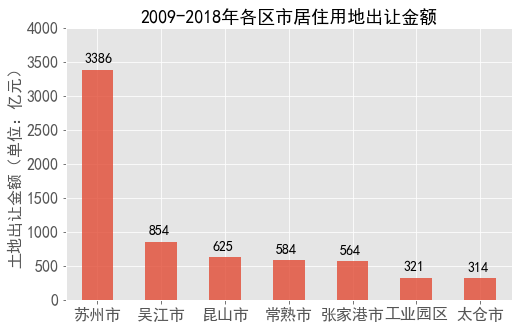

In [173]:
je.plot(kind='bar',fontsize=16,figsize=(8,5),alpha=0.8,ylim=(0,4000))
plt.xticks(rotation=0)
plt.title('2009-2018年各区市居住用地出让金额',fontsize=18)
plt.xlabel('')
plt.ylabel('土地出让金额（单位：亿元）',fontsize=16)
for i in range(len(zd)):
    plt.text(i-0.2,je[i]+100,'{:.0f}'.format(je[i]),fontsize=14)

#### 2.4统计TOP50取地单位

In [176]:
syr = df2.copy()

In [182]:
qd = syr['TDSYR'].groupby(by=syr['TDSYR']).count().sort_values(ascending=False).head(50)

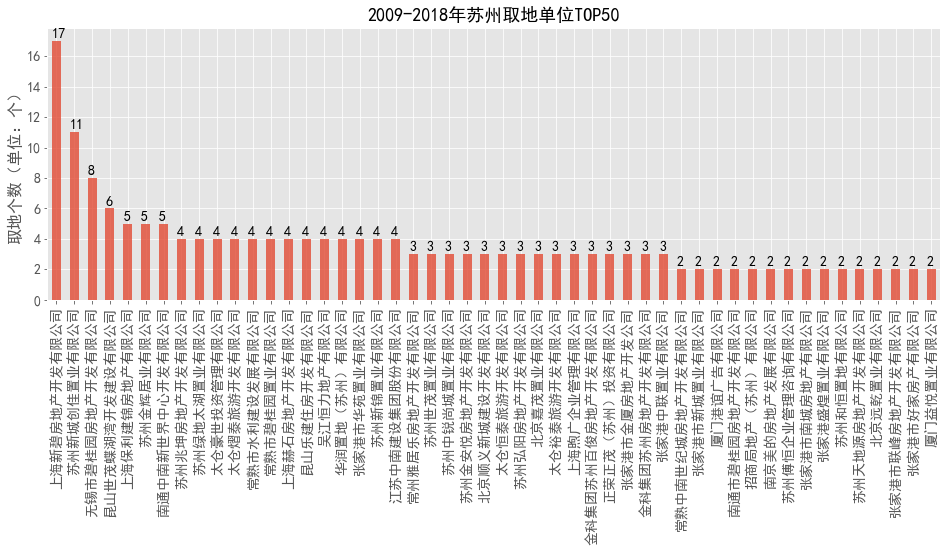

In [200]:
qd.plot(kind='bar',fontsize=14,figsize=(16,5),alpha=0.8)
#plt.xticks(rotation=75)
plt.title('2009-2018年苏州取地单位TOP50',fontsize=18)
plt.xlabel('')
plt.ylabel('取地个数（单位：个）',fontsize=16)
for i in range(len(qd)):
    plt.text(i-0.25,qd[i]+0.2,'{:.0f}'.format(qd[i]),fontsize=14)

### 3.使用透视表分析数据

#### 3.1各区域历年出让宗数分析

In [208]:
xz.pivot_table(index='QDRQ',columns='PZDW1',values='CJJG',aggfunc='count')

PZDW1,吴江市,太仓市,工业园区,常熟市,张家港市,昆山市,苏州市
QDRQ,,,,,,,
2009,13.0,30.0,NaN,16.0,23.0,15.0,38.0
2010,16.0,46.0,3.0,33.0,18.0,43.0,46.0
2011,2.0,9.0,4.0,17.0,9.0,13.0,31.0
2012,14.0,1.0,6.0,13.0,18.0,9.0,2.0
2013,24.0,1.0,2.0,21.0,31.0,27.0,32.0
2014,19.0,1.0,4.0,14.0,NaN,NaN,33.0
2015,30.0,NaN,3.0,7.0,7.0,7.0,29.0
2016,22.0,5.0,2.0,5.0,25.0,8.0,40.0
2017,18.0,36.0,1.0,29.0,32.0,10.0,35.0


Text(0.5, 1.0, '各区域历年出让宗数分析')

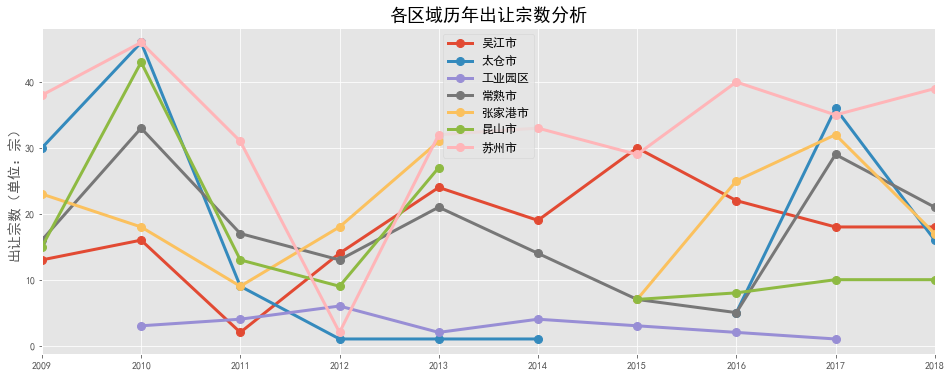

In [231]:
lnzs = xz.pivot_table(index='QDRQ',columns='PZDW1',values='CJJG',aggfunc='count')
lnzs.plot(figsize=(16,6),linewidth=3,marker='o',markersize=8)
plt.legend(fontsize=12)
plt.xlabel('')
plt.ylabel('出让宗数（单位：宗）',fontsize=14)
plt.title('各区域历年出让宗数分析',fontsize=18)

#### 3.2各区域历年出让面积分析

In [235]:
lnmj = xz.pivot_table(index='QDRQ',columns='PZDW1',values='MJ',aggfunc='sum')

#### 3.3各区域历年出让金额分析

In [236]:
lnje = xz.pivot_table(index='QDRQ',columns='PZDW1',values='CJJG',aggfunc='sum')

#### 3.4.地价分析
>地价等于成交价格/用地面积（公顷）/15 -->亩

In [239]:
xz['TDJG'] = xz['CJJG'] / xz['MJ'] / 15

In [241]:
xz['TDJG'].describe()

count    1169.000000
mean      624.226510
std       658.366743
min         0.000000
25%       179.996635
50%       422.666667
75%       811.000000
max      4347.000001
Name: TDJG, dtype: float64

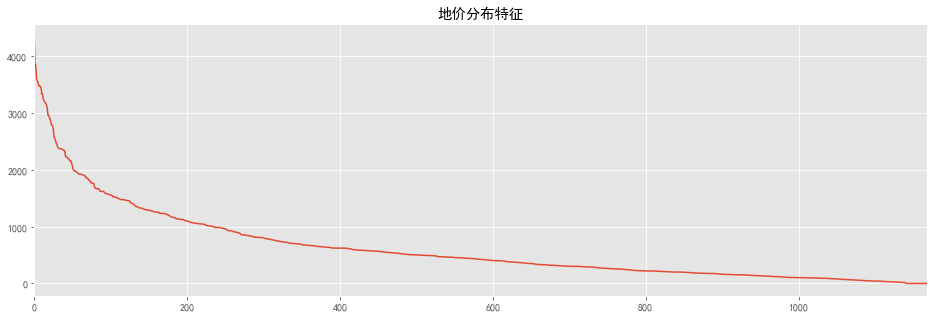

In [278]:
xz['TDJG'].sort_values(ascending=False).reset_index()['TDJG'].\
plot(figsize=(16,5))
plt.title('地价分布特征')
plt.show()

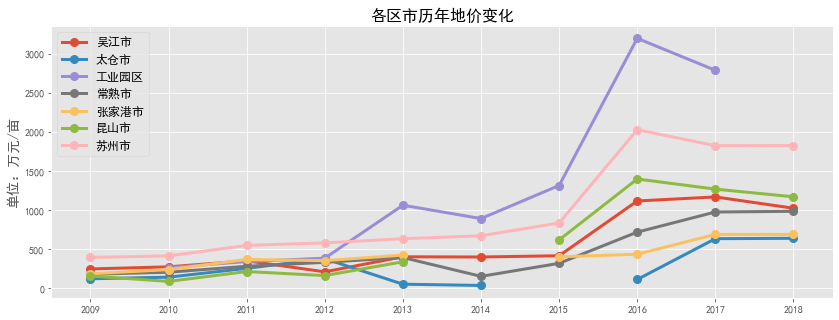

In [289]:
xz.pivot_table(index='QDRQ',columns='PZDW1',values='TDJG').\
plot(figsize=(14,5),linewidth=3,marker='o',markersize=8,xlim=(2008.5,2018.5))
plt.legend(loc=2,fontsize=12)
plt.title('各区市历年地价变化',fontsize=16)
plt.xlabel('')
plt.ylabel('单位：万元/亩',fontsize=14)
plt.xticks([i for i in range(2009,2019)],[i for i in range(2009,2019)])
plt.show()